In [1]:
import h5py
import glob
import shapely
import matplotlib.pyplot as plt

import sprawl
from sprawl import plotting

glob.glob('/scratch/users/rbierman/spatial_collaboration/work/29/b58158eb7b05df5d0684df645de7e3/*')

['/scratch/users/rbierman/spatial_collaboration/work/29/b58158eb7b05df5d0684df645de7e3/spot_assigned_fov.hdf5',
 '/scratch/users/rbierman/spatial_collaboration/work/29/b58158eb7b05df5d0684df645de7e3/spot_assigned_fov_gv.hdf5']

In [2]:
#this is the file before filtering and variance calculation
f_in = h5py.File(
    '/scratch/users/rbierman/spatial_collaboration/work/29/b58158eb7b05df5d0684df645de7e3/spot_assigned_fov.hdf5',
    'r',
)

print(f_in.keys())
print(f_in['cell_ids'][:2]) #there are ~144, just printing the first two
print(f_in['genes'][:])
print(f_in['cells']['101893369730137534934277062422669960009'].keys())
f_in.close()

<KeysViewHDF5 ['cell_ids', 'cells', 'genes']>
[b'101893369730137534934277062422669960009'
 b'103033477859306864900208580085719782529']
[b'0' b'1' b'10' b'100' b'103' b'105' b'107' b'109' b'11' b'111' b'112'
 b'114' b'115' b'116' b'117' b'12' b'120' b'121' b'123' b'126' b'128'
 b'129' b'130' b'131' b'132' b'133' b'134' b'136' b'137' b'138' b'14'
 b'140' b'143' b'144' b'145' b'146' b'147' b'151' b'153' b'154' b'156'
 b'158' b'159' b'16' b'164' b'169' b'17' b'171' b'175' b'179' b'18' b'19'
 b'2' b'20' b'21' b'22' b'23' b'24' b'26' b'27' b'28' b'29' b'3' b'30'
 b'31' b'32' b'33' b'34' b'35' b'36' b'38' b'39' b'4' b'41' b'42' b'43'
 b'44' b'45' b'46' b'47' b'48' b'49' b'5' b'50' b'52' b'53' b'54' b'55'
 b'56' b'57' b'58' b'59' b'6' b'60' b'61' b'62' b'63' b'64' b'65' b'66'
 b'67' b'68' b'7' b'71' b'73' b'75' b'76' b'78' b'79' b'8' b'80' b'81'
 b'82' b'83' b'84' b'86' b'87' b'88' b'89' b'9' b'90' b'91' b'92' b'93'
 b'94' b'96' b'97' b'98' b'99']
<KeysViewHDF5 ['boundaries', 'spot_coords', 's

In [3]:
#???
sample = sprawl.HDF5(
    '/scratch/users/rbierman/spatial_collaboration/work/29/b58158eb7b05df5d0684df645de7e3/spot_assigned_fov.hdf5',
)
sample

HDF5 /scratch/users/rbierman/spatial_collaboration/work/29/b58158eb7b05df5d0684df645de7e3/spot_assigned_fov.hdf5

In [4]:
plotting.plot_cell_3D?

In [5]:
#none of the cell have 100 spots, so they are all filtered out
#I can change this threshold if too much data is thrown away
for cell in sample.cells():
    num_spots = sum(cell.gene_counts.values())
    print(num_spots)
#     fig,ax = plotting.plot_cell_3D(cell)
#     plt.title(num_spots)
#     plt.show()
#     plt.close()

14
1
1
6
1
6
1
12
1
8
6
1
34
13
1
7
2
15
3
2
6
4
2
4
6
40
11
1
1
9
1
7
4
3
4
1
1
13
3
4
6
3
21
1
5
42
2
1
5
8
1
3
34
28
4
2
39
2
4
11
1
35
2
1
48
58
9
10
15
17
8
4
40
14
3
7
2
1
2
4
8
36
3
1
4
14
33
4
6
8
8
5
2
3
1
1
3
1
3
67
1
3
44
21
1
2
17
29
8
5
3
1
33
4


In [6]:
#this is the file AFTER filtering and variance calculation (all the cells are lost)
f_filt = h5py.File(
    '/scratch/users/rbierman/spatial_collaboration/work/29/b58158eb7b05df5d0684df645de7e3/spot_assigned_fov_gv.hdf5',
    'r',
)

print(f_filt.keys())
print(f_filt['cell_ids'])
f_filt.close()

<KeysViewHDF5 ['cell_ids', 'cells', 'genes']>
<HDF5 dataset "cell_ids": shape (0,), type "<f8">


In [7]:
#here's a dataset where there are cells remaining after filtering

sample = sprawl.HDF5(
    '/scratch/users/rbierman/spatial_collaboration/work/fe/1fb5f56fc6c94d614e8ea6dff5c4c6/spot_assigned_fov_gv.hdf5',
)
sample.num_cells

67

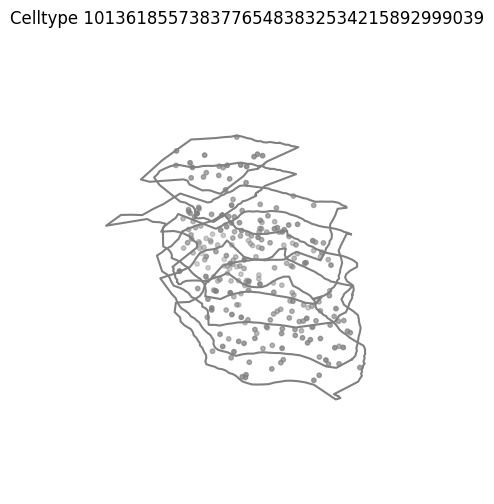

In [8]:
for cell in sample.iter_cells():
    fig,ax = plotting.plot_cell_3D(cell)
    plt.show()
    plt.close()
    break

In [31]:
cell.gene_vars

{'10': 0.009543154378012005,
 '100': 0.16734138553380534,
 '130': 0.16734138553380534,
 '16': 0.16734138553380534,
 '17': 0.19998667221990843,
 '18': 0.13277578786616692,
 '2': 0.16734138553380534,
 '22': 0.08705409782960803,
 '23': 0.16734138553380534,
 '26': 0.10927483918737571,
 '30': 0.055689018464528645,
 '31': 0.19998667221990843,
 '34': 0.1416719224132801,
 '35': 0.13277578786616692,
 '36': 0.19998667221990843,
 '39': 0.015206082432973195,
 '42': 0.19998667221990843,
 '47': 0.19998667221990843,
 '56': 0.16734138553380534,
 '60': 0.19998667221990843,
 '62': 0.02212591600346702,
 '67': 0.08705409782960803,
 '68': 0.16734138553380534,
 '71': 0.16734138553380534,
 '87': 0.16734138553380534,
 '92': 0.16734138553380534}

In [36]:
import os

hdf5_paths = glob.glob(
    '/oak/stanford/groups/horence/rob/isoform_localizations/sprawl/preprocessing/Livnat_Ovarian_Cancer_preprocessing/finished_outputs/*.hdf5',
)

for hdf5_path in hdf5_paths:
    sample = sprawl.HDF5(hdf5_path)
    print(os.path.basename(hdf5_path),'has',sample.num_cells,'cells and',sample.num_genes,'genes')
    


HuOvarianCancer_VS14_22365_2_CP_A1_08-30-2021.hdf5 has 3699 cells and 178 genes
HuOvarianCancer_VS14_20438_2_CP_A1_08-31-2021.hdf5 has 17863 cells and 180 genes
HuOvarianCancer_VS14_23923_2_CP_A1_09-01-2021.hdf5 has 5778 cells and 179 genes
HuOvarianCancer_VS14_21361_3_CP_A6_08-31-2021.hdf5 has 23483 cells and 180 genes
HuOvarianCancer_VS14_23359_3_CP_A3_09-01-2021.hdf5 has 97033 cells and 180 genes


In [38]:
pd.read_csv?

# Converting barcode_id to gene name in the final outputs

Need to get a mapping from barcode_id to gene_name which is already present in the detected_transcripts csvs

Making sure that each barcode-id corresponds to the same gene in all samples

There is also a transcript_id column so I'll check if it's possible to have many-to-many relations between the columns

In [42]:
%%time
import pandas as pd
import glob
import os

spot_paths = glob.glob('/scratch/users/rbierman/spatial_collaboration/detected_transcripts/*.csv')

df = pd.DataFrame()

for spot_path in spot_paths:
    print(spot_path)
    
    sub_df = pd.read_csv(
        spot_path,
        usecols=['barcode_id','gene','transcript_id'],
    ).drop_duplicates()
    
    sub_df['sample'] = os.path.basename(spot_path)
    df = pd.concat((df, sub_df))
    
df

/scratch/users/rbierman/spatial_collaboration/detected_transcripts/HuOvarianCancer_VS14_23923_2_CP_A1_09-01-2021_detected_transcripts.csv
/scratch/users/rbierman/spatial_collaboration/detected_transcripts/HuOvarianCancer_VS14_21361_3_CP_A6_08-31-2021_detected_transcripts.csv
/scratch/users/rbierman/spatial_collaboration/detected_transcripts/HuOvarianCancer_VS14_22365_2_CP_A1_08-30-2021_detected_transcripts.csv
/scratch/users/rbierman/spatial_collaboration/detected_transcripts/HuOvarianCancer_VS14_23359_3_CP_A3_09-01-2021_detected_transcripts.csv
/scratch/users/rbierman/spatial_collaboration/detected_transcripts/HuOvarianCancer_VS14_20438_2_CP_A1_08-31-2021_detected_transcripts.csv
CPU times: user 41 s, sys: 7.32 s, total: 48.3 s
Wall time: 48.8 s


,barcode_id,gene,transcript_id,sample
0,0,SAT1,379270,HuOvarianCancer_VS14_23923_2_CP_A1_09-01-2021_...
23,1,CD24,606017,HuOvarianCancer_VS14_23923_2_CP_A1_09-01-2021_...
67,2,GPX4,611653,HuOvarianCancer_VS14_23923_2_CP_A1_09-01-2021_...
80,3,EPCAM,263735,HuOvarianCancer_VS14_23923_2_CP_A1_09-01-2021_...
86,4,VIM,224237,HuOvarianCancer_VS14_23923_2_CP_A1_09-01-2021_...
...,...,...,...,...
38539,142,Blank-2,-1,HuOvarianCancer_VS14_20438_2_CP_A1_08-31-2021_...
38543,144,Blank-4,-1,HuOvarianCancer_VS14_20438_2_CP_A1_08-31-2021_...
38613,161,Blank-21,-1,HuOvarianCancer_VS14_20438_2_CP_A1_08-31-2021_...
38618,164,Blank-24,-1,HuOvarianCancer_VS14_20438_2_CP_A1_08-31-2021_...


In [50]:
#Each barcode_id corresponds to the same single gene across all samples
df.groupby('barcode_id')['gene'].nunique().max()

1

In [51]:
#excluding the transcript_id's that equal -1 (seems to be used for the Blanks..)
#THEN each transcript id has a unique gene
df[df['transcript_id'].ne(-1)].groupby('transcript_id')['gene'].nunique().max()

1

In [53]:
#Each bc corresponds to a single transcript
df.groupby('barcode_id')['transcript_id'].nunique().max()

1

In [49]:
#Each gene is only represented by a single barcode_id
df.groupby('gene')['barcode_id'].nunique().max()

1

In [54]:
#Each gene is only represented by a single transcript_id
df.groupby('gene')['transcript_id'].nunique().max()

1

In [60]:
bc_to_gene_table = df[['barcode_id','gene']].drop_duplicates().reset_index(drop=True)
bc_to_gene_table

,barcode_id,gene
0,0,SAT1
1,1,CD24
2,2,GPX4
3,3,EPCAM
4,4,VIM
...,...,...
175,166,Blank-26
176,170,Blank-30
177,172,Blank-32
178,176,Blank-36


In [62]:
bc_to_gene_table.to_csv(
    '/oak/stanford/groups/horence/rob/isoform_localizations/sprawl/preprocessing/Livnat_Ovarian_Cancer_preprocessing/bc_to_gene.csv',
    index=False,
)

# Testing gene renaming function

In [ ]:
bc_to_gene_table = pd.read_csv(
    '/oak/stanford/groups/horence/rob/isoform_localizations/sprawl/preprocessing/Livnat_Ovarian_Cancer_preprocessing/bc_to_gene.csv',
)
bc_to_gene_table['barcode_id'] = bc_to_gene_table['barcode_id'].astype(str)

bc_to_gene = dict(bc_to_gene_table[['barcode_id', 'gene']].values)

In [7]:
import sprawl
import pandas as pd

#Prepare the mapping
bc_to_gene_table = pd.read_csv(
    '/oak/stanford/groups/horence/rob/isoform_localizations/sprawl/preprocessing/Livnat_Ovarian_Cancer_preprocessing/bc_to_gene.csv',
)
bc_to_gene_table['barcode_id'] = bc_to_gene_table['barcode_id'].astype(str)

bc_to_gene = dict(bc_to_gene_table[['barcode_id', 'gene']].values)


#Read in the sample
p = '/oak/stanford/groups/horence/rob/isoform_localizations/sprawl/preprocessing/Livnat_Ovarian_Cancer_preprocessing/finished_outputs/HuOvarianCancer_VS14_20438_2_CP_A1_08-31-2021.hdf5'

sample = sprawl.HDF5(p)
cell = next(sample.iter_cells())

#List genes before mapping, map, and after
print(cell.genes)
cell.rename_genes(bc_to_gene)
print(cell.genes)

['1', '10', '100', '105', '12', '121', '139', '14', '16', '18', '2', '22', '23', '25', '26', '27', '3', '30', '31', '34', '35', '36', '38', '44', '46', '49', '55', '56', '57', '59', '6', '60', '62', '64', '67', '68', '7', '71', '75', '78', '8', '90', '93', '94']
['ADAR', 'APMAP', 'ARID1A', 'BCAM', 'CD24', 'CD40', 'CD47', 'CDH1', 'CDK12', 'CDK4', 'CTNNB1', 'CXCL16', 'CXCL8', 'DDX5', 'EGR1', 'EP300', 'EPCAM', 'GPX4', 'HDAC1', 'HDAC3', 'HDAC4', 'HDAC5', 'HDAC6', 'IL7', 'JUN', 'KLF4', 'KLF6', 'KMT2C', 'MYC', 'NF1', 'NFKBIA', 'NFKBIZ', 'NOTCH2', 'NSD1', 'PTEN', 'PTPN2', 'SETDB1', 'SIK2', 'SMARCA4', 'STMN1', 'TAF8', 'TAPBP', 'TP53', 'VEGFA']


In [9]:
#Do the gene mapping for all files as sbatch scripts, too slow to do here

{'CD24': 0.14157631070437451,
 'JUN': 0.14157631070437451,
 'TAF8': 0.13273043658263625,
 'HDAC4': 0.16739441220801243,
 'BCAM': 0.19998447476178474,
 'IL7': 0.16739441220801243,
 'PTEN': 0.16739441220801243,
 'CDK4': 0.13273043658263625,
 'HDAC1': 0.14157631070437451,
 'DDX5': 0.07418227525351673,
 'GPX4': 0.10570607951694333,
 'VEGFA': 0.07339497558597478,
 'TAPBP': 0.10570607951694333,
 'CXCL16': 0.19998447476178474,
 'KLF6': 0.07418227525351673,
 'APMAP': 0.13273043658263625,
 'EPCAM': 0.19998447476178474,
 'SMARCA4': 0.08847797974309261,
 'ADAR': 0.10570607951694333,
 'CDH1': 0.07418227525351673,
 'CTNNB1': 0.10912733067248,
 'ARID1A': 0.10570607951694333,
 'HDAC3': 0.13273043658263625,
 'HDAC6': 0.13273043658263625,
 'PTPN2': 0.19998447476178474,
 'MYC': 0.04001613347806755,
 'CD40': 0.16739441220801243,
 'SIK2': 0.16739441220801243,
 'CXCL8': 0.14157631070437451,
 'SETDB1': 0.13273043658263625,
 'STMN1': 0.19998447476178474,
 'HDAC5': 0.16739441220801243,
 'EGR1': 0.167394412208

In [3]:
cell.genes

['1',
 '10',
 '100',
 '105',
 '12',
 '121',
 '139',
 '14',
 '16',
 '18',
 '2',
 '22',
 '23',
 '25',
 '26',
 '27',
 '3',
 '30',
 '31',
 '34',
 '35',
 '36',
 '38',
 '44',
 '46',
 '49',
 '55',
 '56',
 '57',
 '59',
 '6',
 '60',
 '62',
 '64',
 '67',
 '68',
 '7',
 '71',
 '75',
 '78',
 '8',
 '90',
 '93',
 '94']

In [4]:
cell.rename_genes(bc_to_gene)

In [10]:
#check that the gene renaming worked
sample = sprawl.HDF5('/oak/stanford/groups/horence/rob/isoform_localizations/sprawl/preprocessing/Livnat_Ovarian_Cancer_preprocessing/finished_outputs/HuOvarianCancer_VS14_22365_2_CP_A1_08-30-2021.hdf5.gene_renames')
cell = next(sample.iter_cells())
cell

Cell-100289848731271086243241542816791073787-100289848731271086243241542816791073787

In [11]:
cell.genes

['ADAR',
 'APMAP',
 'ARID1A',
 'BCAM',
 'BRCA1',
 'CD24',
 'CDH1',
 'CDK12',
 'CDK4',
 'CXCL8',
 'DDX5',
 'EP300',
 'EPCAM',
 'EZH2',
 'GADD45B',
 'GPX4',
 'HDAC1',
 'HDAC4',
 'HDAC5',
 'ICOSLG',
 'JUN',
 'KLF6',
 'LAG3',
 'MYC',
 'NFKBIZ',
 'NOTCH3',
 'NR4A1',
 'NSD1',
 'RAD51',
 'SETDB1',
 'SIK2',
 'SMARCA4',
 'SMARCD1',
 'SNAI1',
 'STMN1',
 'TAF2',
 'TAF7',
 'TAPBP',
 'TGFB1',
 'TP53',
 'VEGFA']

In [17]:
x = pd.DataFrame({
    'gene':cell.gene_counts.keys(),
    'count':cell.gene_counts.values(),
})

In [19]:
x['var'] = x['gene'].map(cell.gene_vars)
x.sort_values('count')

,gene,count,var
12,TGFB1,2,0.167500
39,SETDB1,2,0.167500
13,TAF7,2,0.167500
24,LAG3,2,0.167500
31,APMAP,2,0.167500
9,TAF2,2,0.167500
19,EZH2,2,0.167500
32,SIK2,2,0.167500
23,SNAI1,2,0.167500
35,SMARCD1,2,0.167500


In [20]:
cell.cell_id

'100289848731271086243241542816791073787'

In [12]:
cell.gene_vars

{'ADAR': 0.14138498986983833,
 'APMAP': 0.1674999149746625,
 'ARID1A': 0.13263952657892047,
 'BCAM': 0.10883243206475532,
 'BRCA1': 0.19997959391898792,
 'CD24': 0.10883243206475532,
 'CDH1': 0.14138498986983833,
 'CDK12': 0.06290006290006289,
 'CDK4': 0.19997959391898792,
 'CXCL8': 0.13263952657892047,
 'DDX5': 0.048867194002760204,
 'EP300': 0.10549215094669642,
 'EPCAM': 0.19997959391898792,
 'EZH2': 0.1674999149746625,
 'GADD45B': 0.1674999149746625,
 'GPX4': 0.19997959391898792,
 'HDAC1': 0.13263952657892047,
 'HDAC4': 0.1674999149746625,
 'HDAC5': 0.19997959391898792,
 'ICOSLG': 0.1674999149746625,
 'JUN': 0.13263952657892047,
 'KLF6': 0.19997959391898792,
 'LAG3': 0.1674999149746625,
 'MYC': 0.10549215094669642,
 'NFKBIZ': 0.024298149939591087,
 'NOTCH3': 0.10883243206475532,
 'NR4A1': 0.1674999149746625,
 'NSD1': 0.13263952657892047,
 'RAD51': 0.19997959391898792,
 'SETDB1': 0.1674999149746625,
 'SIK2': 0.1674999149746625,
 'SMARCA4': 0.13263952657892047,
 'SMARCD1': 0.16749991